In [1]:
import pickle 
import torch 
import os 
import matplotlib.pyplot as plt 
import numpy as np
from pathlib import Path
folder = Path("csvs")

In [2]:
dict_ = {
    'no pretraining': '20240410-212733_5_try_GIN_nopretraining',
    'CWE':'20240409-091349_5_1try_GIN_pretraining_cwepred',
    'feature masking':'20240409-111758_5_1try_GIN_pretraining_featuremasking',
    'link prediction':'20240409-182219_5_1try_GIN_pretraining_linkpred',
    'all tasks added loss': '20240409-220102_5_2try_GIN_pretraining_additionloss_sl_ud',
    'all tasks alternating loss': '20240410-021146_5_2try_GIN_pretraining_alternating_10',
    'all tasks learned-variance loss': '20240410-070033_5_2try_GIN_pretraining_joinedloss_sl_ud',
    'link and masking alt., CWE': '20240410-234612_5_try_GIN_pretraining_alternating_second_stagecwe',
    'feature masking, CWE': '20240411-081120_5_try_GIN_pretraining_featuremask_second_stagecwe'
}
import pandas as pd 

# def get_file(string, tag):
#     for file in folder.iterdir():
#         if string in file.name:
#             print(file.name)
#             df =  pd.read_csv('csvs/' + file.name)
#             # rename unnamed :0
#             df.rename(columns={'Unnamed: 0':'tag'}, inplace=True)
#             # rename unnamed 1
#             df.rename(columns={'Unnamed: 1':'type'}, inplace=True)
#             df = df.loc[df['type']=='value']
#             df = df.loc[df['tag']==tag]
#             del df['type']
#             del df['tag']
#             # the column headers are the indices, and the first row has the values y
#             x = df.columns
#             y = df.iloc[0].values
#             # in y replace numpy float64 nan with 0
#             has_nans = np.isnan(y).any()
#             y = np.nan_to_num(y)
#             return x, y, has_nans
#     return None, None

In [3]:
# get file 
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def get_file(filename,my_tag):
    runs = Path('runs')
    for file in runs.iterdir():
        if filename in file.name:
            print(file.name)
            # walk recursively till you find a file with 'eventout' in the name
            for root, dirs, files in os.walk(file):
                for file in files:
                    if 'events.out' in file:
                        print(root + '/' + file)
                        event_file = root + '/' + file
                        # read events.out.tfevents. file
                        data = []
                        # event accumulator
                        event_acc = EventAccumulator(root)
                        event_acc.Reload()
                        # get all tags
                        tags = event_acc.Tags()['scalars']
                        # get all scalars
                        for tag in tags:
                            if my_tag in tag:
                                data.append(event_acc.Scalars(tag))
                        # get the data
                        for scalar in data:
                            print(scalar)
                        if len(data) == 0:
                            return None, None, None
                        x = [scalar.step for scalar in data[0]]
                        y = [scalar.value for scalar in data[0]]
                        has_nans = np.isnan(y).any()
                        return x, y, has_nans
                        

In [9]:
from tqdm.auto import tqdm
import matplotlib
plot_path = 'val/epoch_/loss'
i =0
X, Y, labels, has_nans = [], [], [], []
for label, filename in tqdm(dict_.items()):
    i+=1
    x, y, has_nans_temp  = get_file(filename, plot_path)
    X.append(x)
    Y.append(y)
    labels.append(label)
    has_nans.append(has_nans_temp)
    # if has_nans: 
    #     continue
    # skip 5 out of 6 points
    # x, y = x[::20], y[::20]
    # print('len', len(x), len(y))
    # plt.plot(x, y, label=label)
    # if i == 3:
        # break

  0%|          | 0/9 [00:00<?, ?it/s]

20240410-212733_5_try_GIN_nopretraining
runs/20240410-212733_5_try_GIN_nopretraining/events.out.tfevents.1712784453.ip-172-31-5-220.6757.0


 11%|█         | 1/9 [00:00<00:02,  3.58it/s]

[ScalarEvent(wall_time=1712784750.755424, step=0, value=0.6377649903297424), ScalarEvent(wall_time=1712785019.6267838, step=1, value=0.6432281136512756), ScalarEvent(wall_time=1712785294.567216, step=2, value=0.6502673029899597), ScalarEvent(wall_time=1712785561.6502898, step=3, value=0.6238605380058289), ScalarEvent(wall_time=1712785827.8388915, step=4, value=0.6380801796913147), ScalarEvent(wall_time=1712786087.0169935, step=5, value=0.6982427835464478), ScalarEvent(wall_time=1712786341.2052453, step=6, value=0.7447407841682434), ScalarEvent(wall_time=1712786609.645628, step=7, value=0.6209726333618164), ScalarEvent(wall_time=1712786872.375927, step=8, value=0.6372331976890564), ScalarEvent(wall_time=1712787137.7740061, step=9, value=0.6319067478179932), ScalarEvent(wall_time=1712787411.276761, step=10, value=0.6492390632629395), ScalarEvent(wall_time=1712787684.8984807, step=11, value=0.6645404100418091), ScalarEvent(wall_time=1712787938.1712399, step=12, value=0.6783398389816284), 

 22%|██▏       | 2/9 [00:00<00:03,  1.89it/s]

[ScalarEvent(wall_time=1712654599.232294, step=0, value=0.6793089509010315), ScalarEvent(wall_time=1712654844.829897, step=1, value=0.7338008284568787), ScalarEvent(wall_time=1712655075.46746, step=2, value=0.6444013714790344), ScalarEvent(wall_time=1712655310.3184597, step=3, value=0.6856548190116882), ScalarEvent(wall_time=1712655554.9508734, step=4, value=0.6403132677078247), ScalarEvent(wall_time=1712655788.2974901, step=5, value=0.6372567415237427), ScalarEvent(wall_time=1712656034.7085865, step=6, value=0.6383295059204102), ScalarEvent(wall_time=1712656267.4662085, step=7, value=0.6619749665260315), ScalarEvent(wall_time=1712656504.7708695, step=8, value=0.6223649382591248), ScalarEvent(wall_time=1712656747.7476275, step=9, value=0.6606910824775696), ScalarEvent(wall_time=1712656987.690009, step=10, value=0.6286153793334961), ScalarEvent(wall_time=1712657235.6913214, step=11, value=0.6401387453079224), ScalarEvent(wall_time=1712657476.9796183, step=12, value=0.6214205026626587), 

 33%|███▎      | 3/9 [00:04<00:10,  1.67s/it]

[ScalarEvent(wall_time=1712668968.7950077, step=0, value=0.7335192561149597), ScalarEvent(wall_time=1712669224.2251031, step=1, value=0.7387477159500122), ScalarEvent(wall_time=1712669479.3696463, step=2, value=0.6619528532028198), ScalarEvent(wall_time=1712669722.435337, step=3, value=0.6647457480430603), ScalarEvent(wall_time=1712669965.0937777, step=4, value=0.6610525250434875), ScalarEvent(wall_time=1712670208.8096583, step=5, value=0.62935870885849), ScalarEvent(wall_time=1712670449.1613703, step=6, value=0.6428056955337524), ScalarEvent(wall_time=1712670692.348948, step=7, value=0.6320475935935974), ScalarEvent(wall_time=1712670938.0206733, step=8, value=0.6235440969467163), ScalarEvent(wall_time=1712671201.9693184, step=9, value=0.6245420575141907), ScalarEvent(wall_time=1712671469.8448162, step=10, value=0.6190687417984009), ScalarEvent(wall_time=1712671734.112057, step=11, value=0.7351080775260925), ScalarEvent(wall_time=1712671981.814129, step=12, value=0.624065637588501), Sc

 44%|████▍     | 4/9 [00:15<00:27,  5.43s/it]

[ScalarEvent(wall_time=1712694055.8207078, step=0, value=0.647537887096405), ScalarEvent(wall_time=1712694303.8726516, step=1, value=0.632392406463623), ScalarEvent(wall_time=1712694556.7048697, step=2, value=0.63917076587677), ScalarEvent(wall_time=1712694800.086103, step=3, value=0.6219804883003235), ScalarEvent(wall_time=1712695057.0112042, step=4, value=0.6208430528640747), ScalarEvent(wall_time=1712695319.0113559, step=5, value=0.642044186592102), ScalarEvent(wall_time=1712695568.5917385, step=6, value=0.6261935234069824), ScalarEvent(wall_time=1712695817.5048053, step=7, value=0.6175585985183716), ScalarEvent(wall_time=1712696069.027217, step=8, value=0.6330989003181458), ScalarEvent(wall_time=1712696336.318926, step=9, value=0.651422917842865), ScalarEvent(wall_time=1712696592.3809538, step=10, value=0.7384307384490967), ScalarEvent(wall_time=1712696849.6144867, step=11, value=0.6198475360870361), ScalarEvent(wall_time=1712697126.3285017, step=12, value=0.622929036617279), Scala

 56%|█████▌    | 5/9 [00:35<00:42, 10.67s/it]

[ScalarEvent(wall_time=1712709927.7295284, step=0, value=0.7404367923736572), ScalarEvent(wall_time=1712710192.0594313, step=1, value=0.6900739669799805), ScalarEvent(wall_time=1712710456.3491592, step=2, value=0.6842097640037537), ScalarEvent(wall_time=1712710723.8826132, step=3, value=0.6442665457725525), ScalarEvent(wall_time=1712710978.1635149, step=4, value=0.6219229698181152), ScalarEvent(wall_time=1712711232.5131612, step=5, value=0.6425225138664246), ScalarEvent(wall_time=1712711488.262055, step=6, value=0.6543881297111511), ScalarEvent(wall_time=1712711746.6056108, step=7, value=0.6421011090278625), ScalarEvent(wall_time=1712712016.1031141, step=8, value=0.6377074718475342), ScalarEvent(wall_time=1712712269.2340071, step=9, value=0.7672054171562195), ScalarEvent(wall_time=1712712519.0155704, step=10, value=0.6360626816749573), ScalarEvent(wall_time=1712712779.5940416, step=11, value=0.6736224293708801), ScalarEvent(wall_time=1712713039.6964188, step=12, value=0.761762320995330

 67%|██████▋   | 6/9 [01:06<00:52, 17.53s/it]

[ScalarEvent(wall_time=1712724498.7789695, step=0, value=0.6870794892311096), ScalarEvent(wall_time=1712724761.5526934, step=1, value=0.6939037442207336), ScalarEvent(wall_time=1712725024.5356882, step=2, value=0.6438594460487366), ScalarEvent(wall_time=1712725283.2747478, step=3, value=0.6308361291885376), ScalarEvent(wall_time=1712725548.008378, step=4, value=0.6394892930984497), ScalarEvent(wall_time=1712725804.1107209, step=5, value=0.6487811207771301), ScalarEvent(wall_time=1712726057.2808714, step=6, value=0.7009729743003845), ScalarEvent(wall_time=1712726298.9540713, step=7, value=0.6248610019683838), ScalarEvent(wall_time=1712726553.53039, step=8, value=0.6372153162956238), ScalarEvent(wall_time=1712726806.7510164, step=9, value=0.6719772219657898), ScalarEvent(wall_time=1712727066.22326, step=10, value=0.9286212921142578), ScalarEvent(wall_time=1712727319.2086287, step=11, value=0.6264420747756958), ScalarEvent(wall_time=1712727573.257422, step=12, value=0.6308833360671997), S

 78%|███████▊  | 7/9 [01:31<00:39, 19.99s/it]

[ScalarEvent(wall_time=1712741778.9649148, step=0, value=0.6786394119262695), ScalarEvent(wall_time=1712742032.2646313, step=1, value=0.6573585867881775), ScalarEvent(wall_time=1712742266.5913796, step=2, value=0.6267521381378174), ScalarEvent(wall_time=1712742505.467353, step=3, value=0.6355006098747253), ScalarEvent(wall_time=1712742753.4461877, step=4, value=0.6296562552452087), ScalarEvent(wall_time=1712742992.8612587, step=5, value=0.6197015047073364), ScalarEvent(wall_time=1712743231.2602324, step=6, value=0.6651937365531921), ScalarEvent(wall_time=1712743480.4061399, step=7, value=0.6310195922851562), ScalarEvent(wall_time=1712743719.2547677, step=8, value=0.6203669905662537), ScalarEvent(wall_time=1712743958.2115333, step=9, value=0.6236492991447449), ScalarEvent(wall_time=1712744208.0450525, step=10, value=0.6680709719657898), ScalarEvent(wall_time=1712744446.7354288, step=11, value=0.6321287751197815), ScalarEvent(wall_time=1712744694.2957716, step=12, value=0.624218344688415

 89%|████████▉ | 8/9 [02:38<00:35, 35.12s/it]

[ScalarEvent(wall_time=1712812688.742737, step=0, value=0.6810593008995056), ScalarEvent(wall_time=1712812930.1764164, step=1, value=0.6487488746643066), ScalarEvent(wall_time=1712813177.3477685, step=2, value=0.6291041374206543), ScalarEvent(wall_time=1712813413.6216946, step=3, value=0.6319637894630432), ScalarEvent(wall_time=1712813667.6079326, step=4, value=0.6213191151618958), ScalarEvent(wall_time=1712813909.4528441, step=5, value=0.6397717595100403), ScalarEvent(wall_time=1712814144.9195304, step=6, value=0.638175904750824), ScalarEvent(wall_time=1712814391.045561, step=7, value=0.670166015625), ScalarEvent(wall_time=1712814645.2289684, step=8, value=0.7671678066253662), ScalarEvent(wall_time=1712814902.1118734, step=9, value=0.6204958558082581), ScalarEvent(wall_time=1712815141.905259, step=10, value=0.6357042789459229), ScalarEvent(wall_time=1712815397.4292638, step=11, value=2.4071784019470215), ScalarEvent(wall_time=1712815633.9092083, step=12, value=0.6196664571762085), Sca

100%|██████████| 9/9 [03:23<00:00, 22.57s/it]

[ScalarEvent(wall_time=1712842776.2629347, step=0, value=0.6463220715522766), ScalarEvent(wall_time=1712843036.22821, step=1, value=0.9437428712844849), ScalarEvent(wall_time=1712843296.7554748, step=2, value=0.6577150225639343), ScalarEvent(wall_time=1712843557.0560396, step=3, value=0.6331226825714111), ScalarEvent(wall_time=1712843817.684711, step=4, value=0.6694297790527344), ScalarEvent(wall_time=1712844077.6099937, step=5, value=0.6973870992660522), ScalarEvent(wall_time=1712844339.3688004, step=6, value=0.774141252040863), ScalarEvent(wall_time=1712844601.3681078, step=7, value=0.6771450638771057), ScalarEvent(wall_time=1712844861.9515646, step=8, value=0.6334211826324463), ScalarEvent(wall_time=1712845121.5770352, step=9, value=1.104371190071106), ScalarEvent(wall_time=1712845382.078731, step=10, value=0.7394921779632568), ScalarEvent(wall_time=1712845643.364729, step=11, value=1.8325600624084473), ScalarEvent(wall_time=1712845903.3817904, step=12, value=0.6995168328285217), Sc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


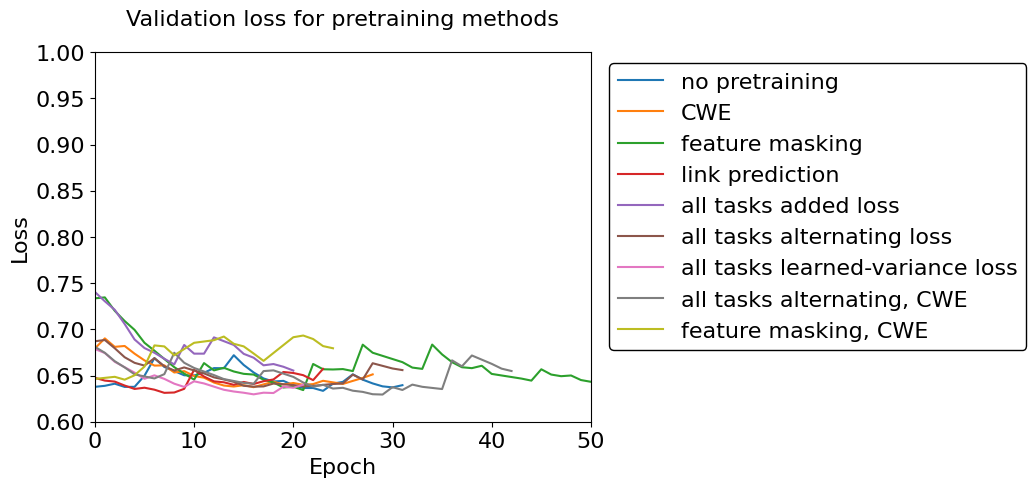

In [21]:
import matplotlib.pyplot as plt
plot_path = 'val/epoch_/loss'
plot_title = 'Validation Loss'
plot_y = 'Loss'
plot_x = 'Epoch'

font = {
         'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)

leg = plt.legend(loc='upper right', bbox_to_anchor=(1.76, 1), ncol=1)

leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)

plt.title(plot_title,y = 1.05)

sorteds = [ 'no pretraining',
    'CWE',
    'feature masking',
    'link prediction',
    'all tasks added loss',
    'all tasks alternating loss',
    'all tasks learned-variance loss',
    'all tasks alternating, CWE',
    'feature masking, CWE',
]
zipped= zip(X, Y, labels, has_nans)
# sort by sorteds
zipped = sorted(zipped, key=lambda x: sorteds.index(x[2]))

# moving average 0.99
def ewma(y, alpha=0.99):
    ewma_values = [y[0]]
    for i in range(1, len(y)):
        ewma_values.append(alpha * ewma_values[-1] + (1 - alpha) * y[i])
    return ewma_values


for x, y, label, has_nanx in zipped:
    # sort x and y by x
    x, y = zip(*sorted(zip(x, y)))
    
    # filter values higeher 0.8
    x, y = zip(*[(x[i], y[i]) for i in range(len(x)) if y[i] < 0.8])
    
    plt.plot(x, ewma(y, alpha=0.8), label=label)

# for x, y, label, has_nanx in zipped:
#     df = pd.DataFrame({"Step": x, "Value": y}, columns=["Step", "Value"])
#     # sort by x
#     df = df.sort_values(by=["Step"])
    
    
#     plt.plot(df["Step"], df.ewm(alpha=(1 - 0.98)).mean()["Value"], label=label)


plt.title('Validation loss for pretraining methods',y = 1.05)
plt.xlabel('Epoch')
plt.ylabel('Loss')
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1), ncol=1)

leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
# set edge color 
# leg.get_frame().set_linewidth(0.0)
# set x lim
plt.ylim(0.6, 1)
# set xlim
plt.xlim(0,50)

plt.savefig(f"vallossepoch.png", dpi=300, bbox_inches='tight')
plt.show()

In [19]:
df

tag   type         64       6464      12864  \
0                       train/loss  value   1.064104   3.529183   2.004303   
2                  train/precision  value   0.000000   0.000000   0.000000   
4                     train/recall  value   0.000000   0.000000   0.000000   
6                         train/f1  value   0.000000   0.000000   0.000000   
8          train/balanced_accuracy  value   0.400000   0.464286   0.333333   
10                        train/TP  value   0.000000   0.000000   0.000000   
12                        train/FP  value   3.000000   1.000000   5.000000   
14                        train/TN  value  12.000000  13.000000  10.000000   
16                        train/FN  value   1.000000   2.000000   1.000000   
18          train/loss_supervision  value   1.064104   3.529183   2.004303   
20               train/epoch_/loss  value        NaN        NaN        NaN   
22          train/epoch_/precision  value        NaN        NaN        NaN   
24             train/epoch_/recall  value        NaN        NaN        NaN   
26                 train/epoch_/f1  value        NaN        NaN        NaN   
28  train/epoch_/balanced_accuracy  value        NaN        NaN        NaN   
30                 train/epoch_/TP  value        NaN        NaN        NaN   
32                 train/epoch_/FP  value        NaN        NaN        NaN   
34                 train/epoch_/TN  value        NaN        NaN        NaN   
36                 train/epoch_/FN  value        NaN        NaN        NaN   
38                 val/epoch_/loss  value        NaN        NaN        NaN   
40            val/epoch_/precision  value        NaN        NaN        NaN   
42               val/epoch_/recall  value        NaN        NaN        NaN   
44                   val/epoch_/f1  value        NaN        NaN        NaN   
46    val/epoch_/balanced_accuracy  value        NaN        NaN        NaN   
48                   val/epoch_/TP  value        NaN        NaN        NaN   
50                   val/epoch_/FP  value        NaN        NaN        NaN   
52                   val/epoch_/TN  value        NaN        NaN        NaN   
54                   val/epoch_/FN  value        NaN        NaN        NaN   

        19264      25664      32064      38464      44864  ...            22  \
0    1.366679   1.258175   0.258981   0.245052   1.897137  ...           NaN   
2    0.000000   0.000000   0.000000   0.000000   0.000000  ...           NaN   
4    0.000000   0.000000   0.000000   0.000000   0.000000  ...           NaN   
6    0.000000   0.000000   0.000000   0.000000   0.000000  ...           NaN   
8    0.366667   0.400000   0.406250   0.437500   0.366667  ...           NaN   
10   0.000000   0.000000   0.000000   0.000000   0.000000  ...           NaN   
12   4.000000   3.000000   3.000000   2.000000   4.000000  ...           NaN   
14  11.000000  12.000000  13.000000  14.000000  11.000000  ...           NaN   
16   1.000000   1.000000   0.000000   0.000000   1.000000  ...           NaN   
18   1.366679   1.258175   0.258981   0.245052   1.897137  ...           NaN   
20        NaN        NaN        NaN        NaN        NaN  ...      0.660784   
22        NaN        NaN        NaN        NaN        NaN  ...      0.105113   
24        NaN        NaN        NaN        NaN        NaN  ...      0.625455   
26        NaN        NaN        NaN        NaN        NaN  ...      0.179979   
28        NaN        NaN        NaN        NaN        NaN  ...      0.651556   
30        NaN        NaN        NaN        NaN        NaN  ...   1548.000000   
32        NaN        NaN        NaN        NaN        NaN  ...  13179.000000   
34        NaN        NaN        NaN        NaN        NaN  ...  27706.000000   
36        NaN        NaN        NaN        NaN        NaN  ...    927.000000   
38        NaN        NaN        NaN        NaN        NaN  ...      0.636364   
40        NaN        NaN        NaN        NaN        NaN  ...      0.083965   
42      

In [25]:
get_file(filename, 'pretrain/train_block1/link_prediction/std_param')

20240410-212733_5_try_GIN_nopretraining
runs/20240410-212733_5_try_GIN_nopretraining/events.out.tfevents.1712784453.ip-172-31-5-220.6757.0


(None, None, None)

In [5]:
from tqdm.auto import tqdm
import matplotlib
# X_trainepochloss, Y_trainepochloss, labels_trainepochloss, has_nans_trainepochloss = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'train/epoch_/loss')
#     X_trainepochloss.append(x)
#     Y_trainepochloss.append(y)
#     labels_trainepochloss.append(label)
#     has_nans_trainepochloss.append(has_nans_temp)
 
 
# XX_trainbacc, YX_trainbacc, labelsX_trainbacc, has_nansX_trainbacc = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'train/epoch_/balanced_accuracy')
#     XX_trainbacc.append(x)
#     YX_trainbacc.append(y)
#     labels_trainepochloss.append(label)
#     has_nans_trainepochloss.append(has_nans_temp)
    
X_valloss, Y_valloss, labels_valloss, has_nans_valloss = [], [], [], []
for label, filename in tqdm(dict_.items()):
    x, y, has_nans_temp  = get_file(filename, 'val/epoch_/loss')
    X_valloss.append(x)
    Y_valloss.append(y)
    labels_valloss.append(label)
    has_nans_valloss.append(has_nans_temp)

# X_valbacc, Y_valbacc, labels_valbacc, has_nans_valbacc = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'val/epoch_/balanced_accuracy')
#     X_valbacc.append(x)
#     Y_valbacc.append(y)
#     labels_valbacc.append(label)
#     has_nans_valbacc.append(has_nans_temp)

/opt/conda/envs/pyg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/9 [00:00<?, ?it/s]

20240410-212733_5_try_GIN_nopretraining
runs/20240410-212733_5_try_GIN_nopretraining/events.out.tfevents.1712784453.ip-172-31-5-220.6757.0


 11%|█         | 1/9 [00:00<00:01,  4.25it/s]

[ScalarEvent(wall_time=1712784750.755424, step=0, value=0.6377649903297424), ScalarEvent(wall_time=1712785019.6267838, step=1, value=0.6432281136512756), ScalarEvent(wall_time=1712785294.567216, step=2, value=0.6502673029899597), ScalarEvent(wall_time=1712785561.6502898, step=3, value=0.6238605380058289), ScalarEvent(wall_time=1712785827.8388915, step=4, value=0.6380801796913147), ScalarEvent(wall_time=1712786087.0169935, step=5, value=0.6982427835464478), ScalarEvent(wall_time=1712786341.2052453, step=6, value=0.7447407841682434), ScalarEvent(wall_time=1712786609.645628, step=7, value=0.6209726333618164), ScalarEvent(wall_time=1712786872.375927, step=8, value=0.6372331976890564), ScalarEvent(wall_time=1712787137.7740061, step=9, value=0.6319067478179932), ScalarEvent(wall_time=1712787411.276761, step=10, value=0.6492390632629395), ScalarEvent(wall_time=1712787684.8984807, step=11, value=0.6645404100418091), ScalarEvent(wall_time=1712787938.1712399, step=12, value=0.6783398389816284), 

 22%|██▏       | 2/9 [00:00<00:03,  1.85it/s]

[ScalarEvent(wall_time=1712654599.232294, step=0, value=0.6793089509010315), ScalarEvent(wall_time=1712654844.829897, step=1, value=0.7338008284568787), ScalarEvent(wall_time=1712655075.46746, step=2, value=0.6444013714790344), ScalarEvent(wall_time=1712655310.3184597, step=3, value=0.6856548190116882), ScalarEvent(wall_time=1712655554.9508734, step=4, value=0.6403132677078247), ScalarEvent(wall_time=1712655788.2974901, step=5, value=0.6372567415237427), ScalarEvent(wall_time=1712656034.7085865, step=6, value=0.6383295059204102), ScalarEvent(wall_time=1712656267.4662085, step=7, value=0.6619749665260315), ScalarEvent(wall_time=1712656504.7708695, step=8, value=0.6223649382591248), ScalarEvent(wall_time=1712656747.7476275, step=9, value=0.6606910824775696), ScalarEvent(wall_time=1712656987.690009, step=10, value=0.6286153793334961), ScalarEvent(wall_time=1712657235.6913214, step=11, value=0.6401387453079224), ScalarEvent(wall_time=1712657476.9796183, step=12, value=0.6214205026626587), 

 33%|███▎      | 3/9 [00:03<00:09,  1.55s/it]

[ScalarEvent(wall_time=1712668968.7950077, step=0, value=0.7335192561149597), ScalarEvent(wall_time=1712669224.2251031, step=1, value=0.7387477159500122), ScalarEvent(wall_time=1712669479.3696463, step=2, value=0.6619528532028198), ScalarEvent(wall_time=1712669722.435337, step=3, value=0.6647457480430603), ScalarEvent(wall_time=1712669965.0937777, step=4, value=0.6610525250434875), ScalarEvent(wall_time=1712670208.8096583, step=5, value=0.62935870885849), ScalarEvent(wall_time=1712670449.1613703, step=6, value=0.6428056955337524), ScalarEvent(wall_time=1712670692.348948, step=7, value=0.6320475935935974), ScalarEvent(wall_time=1712670938.0206733, step=8, value=0.6235440969467163), ScalarEvent(wall_time=1712671201.9693184, step=9, value=0.6245420575141907), ScalarEvent(wall_time=1712671469.8448162, step=10, value=0.6190687417984009), ScalarEvent(wall_time=1712671734.112057, step=11, value=0.7351080775260925), ScalarEvent(wall_time=1712671981.814129, step=12, value=0.624065637588501), Sc

 44%|████▍     | 4/9 [00:13<00:24,  4.94s/it]

[ScalarEvent(wall_time=1712694055.8207078, step=0, value=0.647537887096405), ScalarEvent(wall_time=1712694303.8726516, step=1, value=0.632392406463623), ScalarEvent(wall_time=1712694556.7048697, step=2, value=0.63917076587677), ScalarEvent(wall_time=1712694800.086103, step=3, value=0.6219804883003235), ScalarEvent(wall_time=1712695057.0112042, step=4, value=0.6208430528640747), ScalarEvent(wall_time=1712695319.0113559, step=5, value=0.642044186592102), ScalarEvent(wall_time=1712695568.5917385, step=6, value=0.6261935234069824), ScalarEvent(wall_time=1712695817.5048053, step=7, value=0.6175585985183716), ScalarEvent(wall_time=1712696069.027217, step=8, value=0.6330989003181458), ScalarEvent(wall_time=1712696336.318926, step=9, value=0.651422917842865), ScalarEvent(wall_time=1712696592.3809538, step=10, value=0.7384307384490967), ScalarEvent(wall_time=1712696849.6144867, step=11, value=0.6198475360870361), ScalarEvent(wall_time=1712697126.3285017, step=12, value=0.622929036617279), Scala

 56%|█████▌    | 5/9 [00:34<00:42, 10.59s/it]

[ScalarEvent(wall_time=1712709927.7295284, step=0, value=0.7404367923736572), ScalarEvent(wall_time=1712710192.0594313, step=1, value=0.6900739669799805), ScalarEvent(wall_time=1712710456.3491592, step=2, value=0.6842097640037537), ScalarEvent(wall_time=1712710723.8826132, step=3, value=0.6442665457725525), ScalarEvent(wall_time=1712710978.1635149, step=4, value=0.6219229698181152), ScalarEvent(wall_time=1712711232.5131612, step=5, value=0.6425225138664246), ScalarEvent(wall_time=1712711488.262055, step=6, value=0.6543881297111511), ScalarEvent(wall_time=1712711746.6056108, step=7, value=0.6421011090278625), ScalarEvent(wall_time=1712712016.1031141, step=8, value=0.6377074718475342), ScalarEvent(wall_time=1712712269.2340071, step=9, value=0.7672054171562195), ScalarEvent(wall_time=1712712519.0155704, step=10, value=0.6360626816749573), ScalarEvent(wall_time=1712712779.5940416, step=11, value=0.6736224293708801), ScalarEvent(wall_time=1712713039.6964188, step=12, value=0.761762320995330

 67%|██████▋   | 6/9 [01:05<00:52, 17.62s/it]

[ScalarEvent(wall_time=1712724498.7789695, step=0, value=0.6870794892311096), ScalarEvent(wall_time=1712724761.5526934, step=1, value=0.6939037442207336), ScalarEvent(wall_time=1712725024.5356882, step=2, value=0.6438594460487366), ScalarEvent(wall_time=1712725283.2747478, step=3, value=0.6308361291885376), ScalarEvent(wall_time=1712725548.008378, step=4, value=0.6394892930984497), ScalarEvent(wall_time=1712725804.1107209, step=5, value=0.6487811207771301), ScalarEvent(wall_time=1712726057.2808714, step=6, value=0.7009729743003845), ScalarEvent(wall_time=1712726298.9540713, step=7, value=0.6248610019683838), ScalarEvent(wall_time=1712726553.53039, step=8, value=0.6372153162956238), ScalarEvent(wall_time=1712726806.7510164, step=9, value=0.6719772219657898), ScalarEvent(wall_time=1712727066.22326, step=10, value=0.9286212921142578), ScalarEvent(wall_time=1712727319.2086287, step=11, value=0.6264420747756958), ScalarEvent(wall_time=1712727573.257422, step=12, value=0.6308833360671997), S

 78%|███████▊  | 7/9 [01:35<00:42, 21.46s/it]

[ScalarEvent(wall_time=1712741778.9649148, step=0, value=0.6786394119262695), ScalarEvent(wall_time=1712742032.2646313, step=1, value=0.6573585867881775), ScalarEvent(wall_time=1712742266.5913796, step=2, value=0.6267521381378174), ScalarEvent(wall_time=1712742505.467353, step=3, value=0.6355006098747253), ScalarEvent(wall_time=1712742753.4461877, step=4, value=0.6296562552452087), ScalarEvent(wall_time=1712742992.8612587, step=5, value=0.6197015047073364), ScalarEvent(wall_time=1712743231.2602324, step=6, value=0.6651937365531921), ScalarEvent(wall_time=1712743480.4061399, step=7, value=0.6310195922851562), ScalarEvent(wall_time=1712743719.2547677, step=8, value=0.6203669905662537), ScalarEvent(wall_time=1712743958.2115333, step=9, value=0.6236492991447449), ScalarEvent(wall_time=1712744208.0450525, step=10, value=0.6680709719657898), ScalarEvent(wall_time=1712744446.7354288, step=11, value=0.6321287751197815), ScalarEvent(wall_time=1712744694.2957716, step=12, value=0.624218344688415

 89%|████████▉ | 8/9 [02:42<00:36, 36.08s/it]

[ScalarEvent(wall_time=1712812688.742737, step=0, value=0.6810593008995056), ScalarEvent(wall_time=1712812930.1764164, step=1, value=0.6487488746643066), ScalarEvent(wall_time=1712813177.3477685, step=2, value=0.6291041374206543), ScalarEvent(wall_time=1712813413.6216946, step=3, value=0.6319637894630432), ScalarEvent(wall_time=1712813667.6079326, step=4, value=0.6213191151618958), ScalarEvent(wall_time=1712813909.4528441, step=5, value=0.6397717595100403), ScalarEvent(wall_time=1712814144.9195304, step=6, value=0.638175904750824), ScalarEvent(wall_time=1712814391.045561, step=7, value=0.670166015625), ScalarEvent(wall_time=1712814645.2289684, step=8, value=0.7671678066253662), ScalarEvent(wall_time=1712814902.1118734, step=9, value=0.6204958558082581), ScalarEvent(wall_time=1712815141.905259, step=10, value=0.6357042789459229), ScalarEvent(wall_time=1712815397.4292638, step=11, value=2.4071784019470215), ScalarEvent(wall_time=1712815633.9092083, step=12, value=0.6196664571762085), Sca

100%|██████████| 9/9 [03:24<00:00, 22.73s/it]

[ScalarEvent(wall_time=1712842776.2629347, step=0, value=0.6463220715522766), ScalarEvent(wall_time=1712843036.22821, step=1, value=0.9437428712844849), ScalarEvent(wall_time=1712843296.7554748, step=2, value=0.6577150225639343), ScalarEvent(wall_time=1712843557.0560396, step=3, value=0.6331226825714111), ScalarEvent(wall_time=1712843817.684711, step=4, value=0.6694297790527344), ScalarEvent(wall_time=1712844077.6099937, step=5, value=0.6973870992660522), ScalarEvent(wall_time=1712844339.3688004, step=6, value=0.774141252040863), ScalarEvent(wall_time=1712844601.3681078, step=7, value=0.6771450638771057), ScalarEvent(wall_time=1712844861.9515646, step=8, value=0.6334211826324463), ScalarEvent(wall_time=1712845121.5770352, step=9, value=1.104371190071106), ScalarEvent(wall_time=1712845382.078731, step=10, value=0.7394921779632568), ScalarEvent(wall_time=1712845643.364729, step=11, value=1.8325600624084473), ScalarEvent(wall_time=1712845903.3817904, step=12, value=0.6995168328285217), Sc

In [5]:
# training loss, validation loss, validation balanced accuracy, 
# train/epoch_/loss
# # train/epoch_/balanced_accuracy

# val/epoch_/loss
# val/epoch_/balanced_accuracy


from tqdm.auto import tqdm


# 20240410-070033_5_2try_GIN_pretraining_joinedloss_sl_ud
# pretrain/train_block1/link_prediction/std_param
# pretrain/train_block1/feature_maskingwordvector/std_param 
# pretrain/train_block1/feature_maskingtriangle/std_param 
# pretrain/train_block1/feature_maskingdegree/std_param 
# pretrain/train_block1/feature_maskingcategory/std_param
#  pretrain/train_block1/cwe_classification/std_param


# X_linkpred_std, Y_linkpred_std, labels_linkpred_std, has_nans_linkpred_std = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/link_prediction/std_param')
#     X_linkpred_std.append(x)
#     Y_linkpred_std.append(y)
#     labels_linkpred_std.append(label)
#     has_nans_linkpred_std.append(has_nans_temp)

# X_featuremaskingwordvector_std, Y_featuremaskingwordvector_std, labels_featuremaskingwordvector_std, has_nans_featuremaskingwordvector_std = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/feature_maskingwordvector/std_param')
#     X_featuremaskingwordvector_std.append(x)
#     Y_featuremaskingwordvector_std.append(y)
#     labels_featuremaskingwordvector_std.append(label)
#     has_nans_featuremaskingwordvector_std.append(has_nans_temp)

# X_featuremaskingtriangle_std, Y_featuremaskingtriangle_std, labels_featuremaskingtriangle_std, has_nans_featuremaskingtriangle_std = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/feature_maskingtriangle/std_param')
#     X_featuremaskingtriangle_std.append(x)
#     Y_featuremaskingtriangle_std.append(y)
#     labels_featuremaskingtriangle_std.append(label)
#     has_nans_featuremaskingtriangle_std.append(has_nans_temp)

# X_featuremaskingdegree_std, Y_featuremaskingdegree_std, labels_featuremaskingdegree_std, has_nans_featuremaskingdegree_std = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/feature_maskingdegree/std_param')
#     X_featuremaskingdegree_std.append(x)
#     Y_featuremaskingdegree_std.append(y)
#     labels_featuremaskingdegree_std.append(label)
#     has_nans_featuremaskingdegree_std.append(has_nans_temp)
    
# X_featuremaskingcategory_std, Y_featuremaskingcategory_std, labels_featuremaskingcategory_std, has_nans_featuremaskingcategory_std = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/feature_maskingcategory/std_param')
#     X_featuremaskingcategory_std.append(x)
#     Y_featuremaskingcategory_std.append(y)
#     labels_featuremaskingcategory_std.append(label)
#     has_nans_featuremaskingcategory_std.append(has_nans_temp)

# X_cwe_classification_std, Y_cwe_classification_std, labels_cwe_classification_std, has_nans_cwe_classification_std = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/cwe_classification/std_param')
#     X_cwe_classification_std.append(x)
#     Y_cwe_classification_std.append(y)
#     labels_cwe_classification_std.append(label)
#     has_nans_cwe_classification_std.append(has_nans_temp)
    
 
# pretrain/train_block1/link_prediction/f1

X_linkpred_f1, Y_linkpred_f1, labels_linkpred_f1, has_nans_linkpred_f1 = [], [], [], []
for label, filename in tqdm(dict_.items()):
    x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/link_prediction/f1')
    X_linkpred_f1.append(x)
    Y_linkpred_f1.append(y)
    labels_linkpred_f1.append(label)
    has_nans_linkpred_f1.append(has_nans_temp)
    
    
# # pretrain/train_block1/feature_maskingcategory/accuracy
# X_featuremaskingcategory_acc, Y_featuremaskingcategory_acc, labels_featuremaskingcategory_acc, has_nans_featuremaskingcategory_acc = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/feature_maskingcategory/accuracy')
#     X_featuremaskingcategory_acc.append(x)
#     Y_featuremaskingcategory_acc.append(y)
#     labels_featuremaskingcategory_acc.append(label)
#     has_nans_featuremaskingcategory_acc.append(has_nans_temp)
    
# #pretrain/train_block1/cwe_classification/accuracy
# X_cwe_classification_acc, Y_cwe_classification_acc, labels_cwe_classification_acc, has_nans_cwe_classification_acc = [], [], [], []
# for label, filename in tqdm(dict_.items()):
#     x, y, has_nans_temp  = get_file(filename, 'pretrain/train_block1/cwe_classification/accuracy')
#     X_cwe_classification_acc.append(x)
#     Y_cwe_classification_acc.append(y)
#     labels_cwe_classification_acc.append(label)
#     has_nans_cwe_classification_acc.append(has_nans_temp)
    

/opt/conda/envs/pyg/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/9 [00:00<?, ?it/s]

20240410-212733_5_try_GIN_nopretraining
runs/20240410-212733_5_try_GIN_nopretraining/events.out.tfevents.1712784453.ip-172-31-5-220.6757.0


 11%|█         | 1/9 [00:00<00:01,  4.07it/s]

20240409-091349_5_1try_GIN_pretraining_cwepred
runs/20240409-091349_5_1try_GIN_pretraining_cwepred/events.out.tfevents.1712654029.ip-172-31-5-220.130916.0


 22%|██▏       | 2/9 [00:00<00:03,  2.03it/s]

20240409-111758_5_1try_GIN_pretraining_featuremasking
runs/20240409-111758_5_1try_GIN_pretraining_featuremasking/events.out.tfevents.1712661478.ip-172-31-5-220.130916.1


 33%|███▎      | 3/9 [00:03<00:09,  1.59s/it]

20240409-182219_5_1try_GIN_pretraining_linkpred
runs/20240409-182219_5_1try_GIN_pretraining_linkpred/events.out.tfevents.1712686939.ip-172-31-5-220.130916.2


 44%|████▍     | 4/9 [00:15<00:26,  5.39s/it]

[ScalarEvent(wall_time=1712686979.9717786, step=2, value=0.3314127027988434), ScalarEvent(wall_time=1712686980.3497736, step=5, value=0.3279130458831787), ScalarEvent(wall_time=1712686980.5946705, step=7, value=0.3284004032611847), ScalarEvent(wall_time=1712686981.5850773, step=15, value=0.3211767077445984), ScalarEvent(wall_time=1712686981.7091904, step=16, value=0.32692813873291016), ScalarEvent(wall_time=1712686982.3384664, step=21, value=0.331694632768631), ScalarEvent(wall_time=1712686982.4610236, step=22, value=0.33019763231277466), ScalarEvent(wall_time=1712686982.5964715, step=23, value=0.32759466767311096), ScalarEvent(wall_time=1712686983.2154257, step=28, value=0.32991063594818115), ScalarEvent(wall_time=1712686983.4727633, step=30, value=0.32430559396743774), ScalarEvent(wall_time=1712686984.3356867, step=37, value=0.32961583137512207), ScalarEvent(wall_time=1712686984.5892606, step=39, value=0.33227530121803284), ScalarEvent(wall_time=1712686984.9921021, step=42, value=0.3

 56%|█████▌    | 5/9 [00:34<00:42, 10.62s/it]

[ScalarEvent(wall_time=1712700117.3222961, step=12, value=0.33943426609039307), ScalarEvent(wall_time=1712700118.1967158, step=30, value=0.3366795480251312), ScalarEvent(wall_time=1712700118.782332, step=42, value=0.3281596302986145), ScalarEvent(wall_time=1712700119.6555145, step=60, value=0.31060606241226196), ScalarEvent(wall_time=1712700121.1109233, step=90, value=0.31887924671173096), ScalarEvent(wall_time=1712700121.4032187, step=96, value=0.31904345750808716), ScalarEvent(wall_time=1712700121.691686, step=102, value=0.3226768672466278), ScalarEvent(wall_time=1712700122.857051, step=126, value=0.3168851137161255), ScalarEvent(wall_time=1712700123.1492639, step=132, value=0.3273986279964447), ScalarEvent(wall_time=1712700123.4401855, step=138, value=0.3184257447719574), ScalarEvent(wall_time=1712700124.8937304, step=168, value=0.316972017288208), ScalarEvent(wall_time=1712700125.1845093, step=174, value=0.32207000255584717), ScalarEvent(wall_time=1712700125.472897, step=180, value

 67%|██████▋   | 6/9 [01:04<00:51, 17.16s/it]

[ScalarEvent(wall_time=1712715143.543141, step=5, value=0.3176895081996918), ScalarEvent(wall_time=1712715143.643771, step=7, value=0.31882113218307495), ScalarEvent(wall_time=1712715145.4988303, step=45, value=0.32094353437423706), ScalarEvent(wall_time=1712715145.5479991, step=46, value=0.3163016736507416), ScalarEvent(wall_time=1712715145.7969618, step=51, value=0.3214953541755676), ScalarEvent(wall_time=1712715145.8468375, step=52, value=0.31301775574684143), ScalarEvent(wall_time=1712715145.8971848, step=53, value=0.3222341537475586), ScalarEvent(wall_time=1712715146.14521, step=58, value=0.3318062722682953), ScalarEvent(wall_time=1712715147.171081, step=80, value=0.3173515796661377), ScalarEvent(wall_time=1712715147.5155654, step=87, value=0.32631582021713257), ScalarEvent(wall_time=1712715147.6155632, step=89, value=0.32563406229019165), ScalarEvent(wall_time=1712715148.1716297, step=102, value=0.32578396797180176), ScalarEvent(wall_time=1712715148.515814, step=109, value=0.3199

 78%|███████▊  | 7/9 [01:29<00:39, 19.76s/it]

[ScalarEvent(wall_time=1712732468.7681468, step=12, value=0.33476167917251587), ScalarEvent(wall_time=1712732469.664939, step=30, value=0.3250296413898468), ScalarEvent(wall_time=1712732470.2624292, step=42, value=0.33443623781204224), ScalarEvent(wall_time=1712732471.1298635, step=60, value=0.330877423286438), ScalarEvent(wall_time=1712732472.5885942, step=90, value=0.3141269385814667), ScalarEvent(wall_time=1712732472.8734794, step=96, value=0.33106309175491333), ScalarEvent(wall_time=1712732473.159829, step=102, value=0.3237200975418091), ScalarEvent(wall_time=1712732474.2981942, step=126, value=0.3271302878856659), ScalarEvent(wall_time=1712732474.582691, step=132, value=0.3263999819755554), ScalarEvent(wall_time=1712732474.8777578, step=138, value=0.32799801230430603), ScalarEvent(wall_time=1712732476.3139815, step=168, value=0.31847748160362244), ScalarEvent(wall_time=1712732476.598301, step=174, value=0.320704847574234), ScalarEvent(wall_time=1712732476.8816097, step=180, value=

 89%|████████▉ | 8/9 [02:34<00:34, 34.12s/it]

[ScalarEvent(wall_time=1712792809.4516256, step=5, value=0.33063533902168274), ScalarEvent(wall_time=1712792809.917366, step=15, value=0.3045751452445984), ScalarEvent(wall_time=1712792809.9616008, step=16, value=0.32139304280281067), ScalarEvent(wall_time=1712792810.2911766, step=23, value=0.3310719132423401), ScalarEvent(wall_time=1712792810.5224748, step=28, value=0.32375189661979675), ScalarEvent(wall_time=1712792813.0898829, step=82, value=0.3309132754802704), ScalarEvent(wall_time=1712792813.312088, step=87, value=0.3223469853401184), ScalarEvent(wall_time=1712792814.3358452, step=109, value=0.3234962821006775), ScalarEvent(wall_time=1712792814.646431, step=116, value=0.32730990648269653), ScalarEvent(wall_time=1712792815.09346, step=126, value=0.3374626040458679), ScalarEvent(wall_time=1712792815.227717, step=129, value=0.32755589485168457), ScalarEvent(wall_time=1712792815.361053, step=132, value=0.3225460350513458), ScalarEvent(wall_time=1712792815.6342847, step=138, value=0.3

100%|██████████| 9/9 [03:14<00:00, 21.59s/it]


In [6]:
import matplotlib.pyplot as plt

def plotter(plot_title, plot_y,plot_x, X, Y, labels, has_nans, filename, alpha=0.8,  bbox_to_anchor=None, y_lim=None, x_lim=None, legend=True):
    # plot_path = 'val/epoch_/loss'
    # plot_title = 'Validation Loss'
    # plot_y = 'Loss'
    # plot_x = 'Epoch'

    font = {
            'size'   : 16}
    matplotlib.rc('font', **font)
    matplotlib.rc('axes', labelsize=16, titlesize=16)


    sorteds = [ 'no pretraining',
        'CWE',
        'feature masking',
        'link prediction',
        'all tasks added loss',
        'all tasks alternating loss',
        'all tasks learned-variance loss',
        'link and masking alt., CWE',
        'feature masking, CWE',
    ]
    zipped= zip(X, Y, labels, has_nans)
    # sort by sorteds
    zipped = sorted(zipped, key=lambda x: sorteds.index(x[2]))

    # moving average 0.99
    def ewma(y, alpha=0.99):
        ewma_values = [y[0]]
        for i in range(1, len(y)):
            ewma_values.append(alpha * ewma_values[-1] + (1 - alpha) * y[i])
        return ewma_values


    for x, y, label, has_nanx in zipped:
        # sort x and y by x
        x, y = zip(*sorted(zip(x, y)))
        
        # filter values higeher 0.8
        x, y = zip(*[(x[i], y[i]) for i in range(len(x)) if y[i] < 0.8])
        # divide x by 2500
        x = [i/2500 for i in x]
        plt.plot(x, ewma(y, alpha=alpha), label=label)

    # for x, y, label, has_nanx in zipped:
    #     df = pd.DataFrame({"Step": x, "Value": y}, columns=["Step", "Value"])
    #     # sort by x
    #     df = df.sort_values(by=["Step"])
        
        
    #     plt.plot(df["Step"], df.ewm(alpha=(1 - 0.98)).mean()["Value"], label=label)


    plt.title(plot_title,y = 1.05)
    plt.xlabel(plot_x)
    plt.ylabel(plot_y)
    
    if legend:
        if bbox_to_anchor:
            leg = plt.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor, ncol=1)
        else:
            leg = plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1), ncol=1)
        leg.get_frame().set_edgecolor('black')
        # # background white of legend white
        leg.get_frame().set_facecolor('white')
        # # set backgrond non-transparent
        leg.get_frame().set_alpha(1)
    # set edge color 
    # leg.get_frame().set_linewidth(0.0)
    # set x lim
    if y_lim:
        plt.ylim(y_lim)
    if x_lim:
        plt.xlim(x_lim)        

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

In [13]:
plotter

<function __main__.plotter(plot_title, plot_y, plot_x, X, Y, labels, has_nans, filename, alpha=0.8, bbox_to_anchor=None, y_lim=None, x_lim=None, legend=True)>

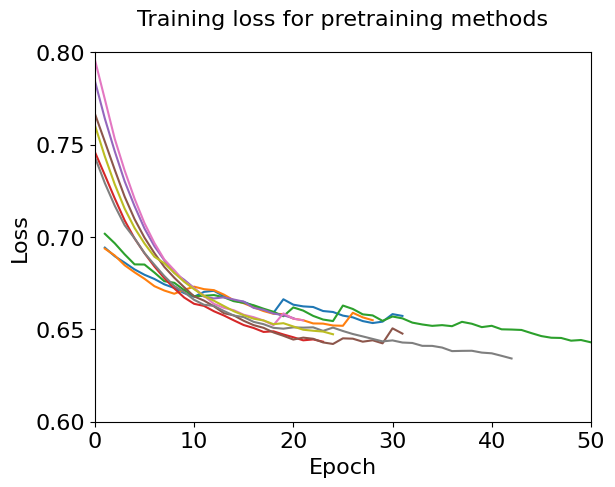

In [42]:
plotter(
    plot_title='Training loss for pretraining methods',
    plot_y='Loss',
    plot_x='Epoch',
    X=X_trainepochloss,
    Y=Y_trainepochloss,
    labels=labels_trainepochloss,
    has_nans=has_nans_trainepochloss,
    filename='trainloss.png',
    bbox_to_anchor=(1.9, 1),
    y_lim=(0.6, 0.8),
    x_lim=(0,50),
    legend=False
    
)

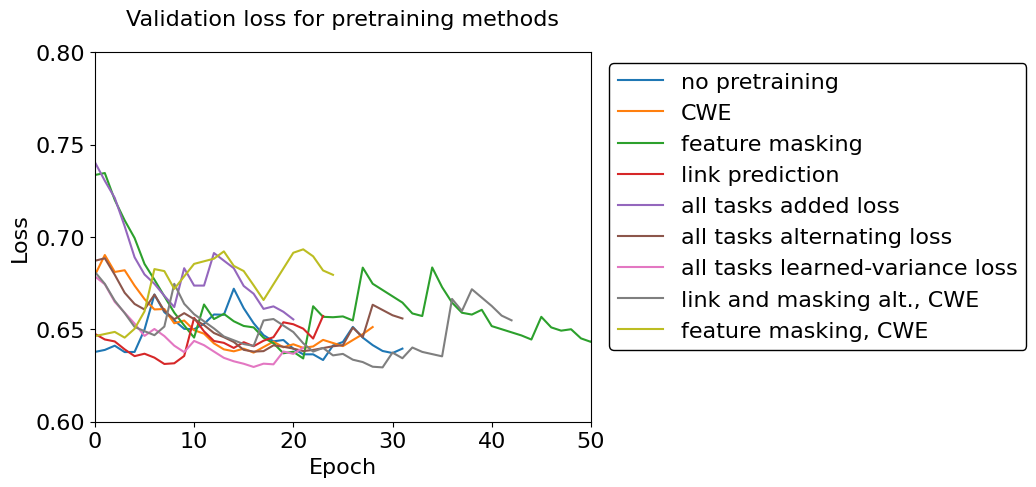

In [17]:
plotter(
    plot_title='Validation loss for pretraining methods',
    plot_y='Loss',
    plot_x='Epoch',
    X=X_valloss,
    Y=Y_valloss,
    labels=labels_valloss,
    has_nans=has_nans_valloss,
    filename='valloss2.png',
    bbox_to_anchor=(1.9, 1),
    y_lim=(0.6, 0.8),
    x_lim=(0,50)
    
)

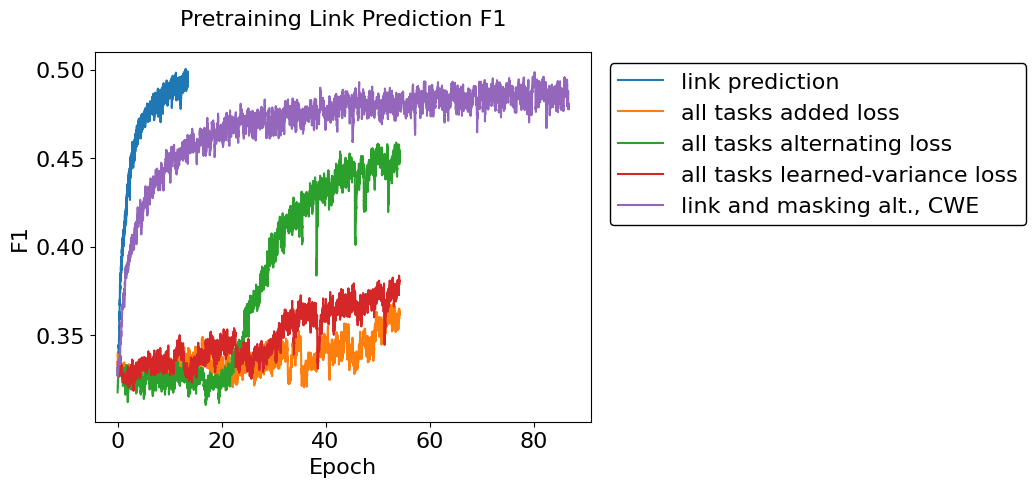

In [8]:
import matplotlib
plotter(
    plot_title='Pretraining Link Prediction F1',
    plot_y='F1',
    plot_x='Epoch',
    filename='linkpredf12.png',
    bbox_to_anchor=(1.9, 1),
    # y_lim=(0.6, 1),
    # x_lim=(0,50),
    # filter if X_linkpred_f1 is None:
    X=[x for x in X_linkpred_f1 if x is not None],
    Y=[y for i, y in enumerate(Y_linkpred_f1) if X_linkpred_f1[i] is not None],
    labels=[label for i, label in enumerate(labels_linkpred_f1) if X_linkpred_f1[i] is not None],
    has_nans=[has_nans for i, has_nans in enumerate(has_nans_linkpred_f1) if X_linkpred_f1[i] is not None]
    ,alpha=0.9
    
    
)

In [111]:
len(X_cwe_classification_acc[7])

TypeError: object of type 'NoneType' has no len()

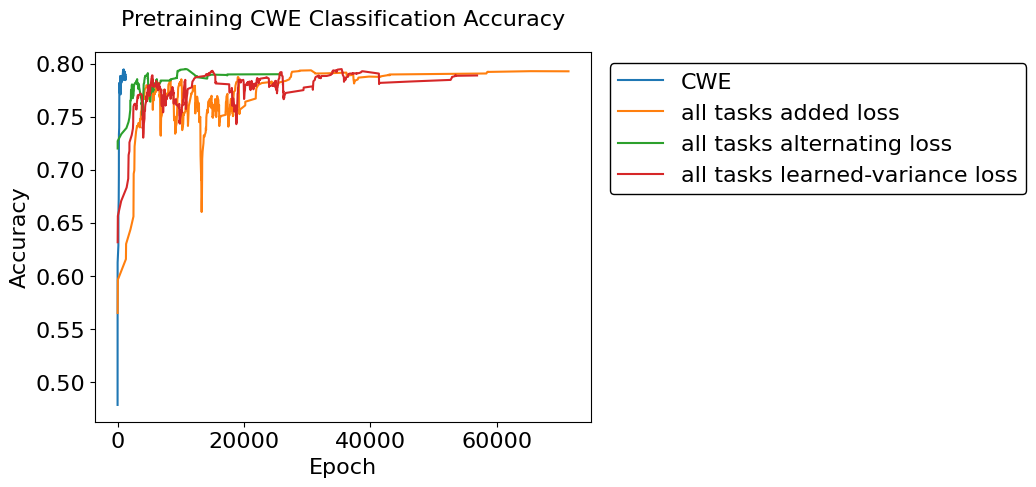

In [112]:
# plotter cwe classification accuracy
plotter(
    plot_title='Pretraining CWE Classification Accuracy',
    plot_y='Accuracy',
    plot_x='Epoch',
    filename='cweclassificationacc.png',
    bbox_to_anchor=(1.9, 1),
    # y_lim=(0.6, 1),
    # x_lim=(0,50),
    # filter if X_linkpred_f1 is None:
    X=[x for x in X_cwe_classification_acc if x is not None],
    Y=[y for i, y in enumerate(Y_cwe_classification_acc) if X_cwe_classification_acc[i] is not None],
    labels=[label for i, label in enumerate(labels_cwe_classification_acc) if X_cwe_classification_acc[i] is not None],
    has_nans=[has_nans for i, has_nans in enumerate(has_nans_cwe_classification_acc) if X_cwe_classification_acc[i] is not None]
    ,alpha=0.9
    
    
)

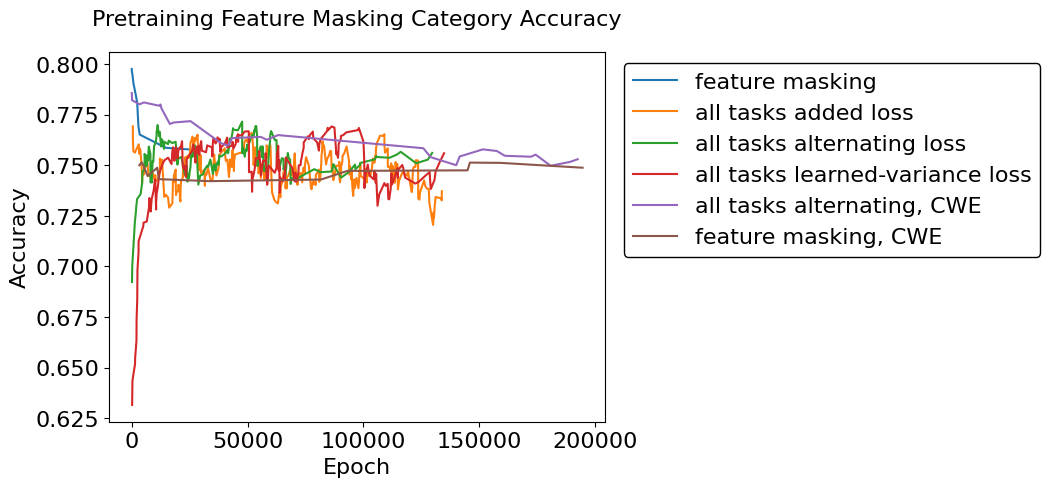

In [113]:
# plotter for X featumaskingcategory acc
plotter(
    plot_title='Pretraining Feature Masking Category Accuracy',
    plot_y='Accuracy',
    plot_x='Epoch',
    filename='featuremaskingcategoryacc.png',
    bbox_to_anchor=(1.9, 1),
    # y_lim=(0.6, 1),
    # x_lim=(0,50),
    # filter if X_linkpred_f1 is None:
    X=[x for x in X_featuremaskingcategory_acc if x is not None],
    Y=[y for i, y in enumerate(Y_featuremaskingcategory_acc) if X_featuremaskingcategory_acc[i] is not None],
    labels=[label for i, label in enumerate(labels_featuremaskingcategory_acc) if X_featuremaskingcategory_acc[i] is not None],
    has_nans=[has_nans for i, has_nans in enumerate(has_nans_featuremaskingcategory_acc) if X_featuremaskingcategory_acc[i] is not None]
    ,alpha=0.9
    # , legend=False
    
)

In [49]:
labels_linkpred_std

('all tasks learned-variance loss',)

In [53]:
len(Y_linkpred_std)

1

In [54]:

# # filter nones from X_linkpred_std, Y_linkpred_std, labels_linkpred_std, has_nans_linkpred_std
# # X_linkpred_std, Y_linkpred_std, labels_linkpred_std, has_nans_linkpred_std = zip(*[(X_linkpred_std[i], Y_linkpred_std[i], labels_linkpred_std[i], has_nans_linkpred_std[i]) for i in range(len(X_linkpred_std)) if X_linkpred_std[i] is not None])

# # filter nones from X_featuremaskingwordvector_std, Y_featuremaskingwordvector_std, labels_featuremaskingwordvector_std, has_nans_featuremaskingwordvector_std
# X_featuremaskingwordvector_std, Y_featuremaskingwordvector_std, labels_featuremaskingwordvector_std, has_nans_featuremaskingwordvector_std = zip(*[(X_featuremaskingwordvector_std[i], Y_featuremaskingwordvector_std[i], labels_featuremaskingwordvector_std[i], has_nans_featuremaskingwordvector_std[i]) for i in range(len(X_featuremaskingwordvector_std)) if X_featuremaskingwordvector_std[i] is not None])

# # filter nones from X_featuremaskingtriangle_std, Y_featuremaskingtriangle_std, labels_featuremaskingtriangle_std, has_nans_featuremaskingtriangle_std
# X_featuremaskingtriangle_std, Y_featuremaskingtriangle_std, labels_featuremaskingtriangle_std, has_nans_featuremaskingtriangle_std = zip(*[(X_featuremaskingtriangle_std[i], Y_featuremaskingtriangle_std[i], labels_featuremaskingtriangle_std[i], has_nans_featuremaskingtriangle_std[i]) for i in range(len(X_featuremaskingtriangle_std)) if X_featuremaskingtriangle_std[i] is not None])

# # filter nones from X_featuremaskingdegree_std, Y_featuremaskingdegree_std, labels_featuremaskingdegree_std, has_nans_featuremaskingdegree_std
# X_featuremaskingdegree_std, Y_featuremaskingdegree_std, labels_featuremaskingdegree_std, has_nans_featuremaskingdegree_std = zip(*[(X_featuremaskingdegree_std[i], Y_featuremaskingdegree_std[i], labels_featuremaskingdegree_std[i], has_nans_featuremaskingdegree_std[i]) for i in range(len(X_featuremaskingdegree_std)) if X_featuremaskingdegree_std[i] is not None])

# # filter nones from X_featuremaskingcategory_std, Y_featuremaskingcategory_std, labels_featuremaskingcategory_std, has_nans_featuremaskingcategory_std
# X_featuremaskingcategory_std, Y_featuremaskingcategory_std, labels_featuremaskingcategory_std, has_nans_featuremaskingcategory_std = zip(*[(X_featuremaskingcategory_std[i], Y_featuremaskingcategory_std[i], labels_featuremaskingcategory_std[i], has_nans_featuremaskingcategory_std[i]) for i in range(len(X_featuremaskingcategory_std)) if X_featuremaskingcategory_std[i] is not None])

# # filter nones from X_cwe_classification_std, Y_cwe_classification_std, labels_cwe_classification_std, has_nans_cwe_classification_std
# X_cwe_classification_std, Y_cwe_classification_std, labels_cwe_classification_std, has_nans_cwe_classification_std = zip(*[(X_cwe_classification_std[i], Y_cwe_classification_std[i], labels_cwe_classification_std[i], has_nans_cwe_classification_std[i]) for i in range(len(X_cwe_classification_std)) if X_cwe_classification_std[i] is not None])



# # plotter(
# #     plot_title='Link prediction std for pretraining methods',
# #     plot_y='std',
# #     plot_x='Epoch',
# #     X=[X_linkpred_std],
# #     Y=[Y_linkpred_std],
# #     labels=[labels_linkpred_std[0]],
# #     has_nans=[has_nans_linkpred_std],
# #     filename='linkpredstd.png',
# #     bbox_to_anchor=(1.9, 1),
# #     y_lim=(0, 0.2),
# #     x_lim=(0,50)
# # )

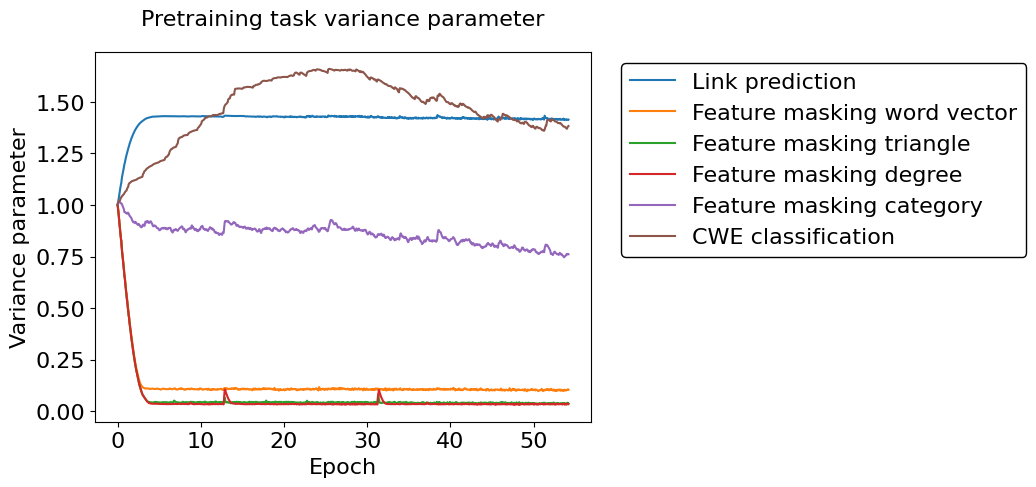

In [77]:
import matplotlib.pyplot as plt
import matplotlib

font = {
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('axes', labelsize=16, titlesize=16)


# sorteds = [ 'no pretraining',
#     'CWE',
#     'feature masking',
#     'link prediction',
#     'all tasks added loss',
#     'all tasks alternating loss',
#     'all tasks learned-variance loss',
#     'all tasks alternating, CWE',
#     'feature masking, CWE',
# ]
X = [X_linkpred_std, X_featuremaskingwordvector_std, X_featuremaskingtriangle_std, X_featuremaskingdegree_std, X_featuremaskingcategory_std, X_cwe_classification_std]
Y = [Y_linkpred_std, Y_featuremaskingwordvector_std, Y_featuremaskingtriangle_std, Y_featuremaskingdegree_std, Y_featuremaskingcategory_std, Y_cwe_classification_std]


labels = ['Link prediction', 'Feature masking word vector', 'Feature masking triangle', 'Feature masking degree', 'Feature masking category', 'CWE classification']
has_nans = [has_nans_linkpred_std, has_nans_featuremaskingwordvector_std, has_nans_featuremaskingtriangle_std, has_nans_featuremaskingdegree_std, has_nans_featuremaskingcategory_std, has_nans_cwe_classification_std]
zipped= zip(X, Y, labels, has_nans)
# sort by sorteds
# zipped = sorted(zipped, key=lambda x: sorteds.index(x[2]))

# moving average 0.99
def ewma(y, alpha=0.99):
    ewma_values = [y[0]]
    for i in range(1, len(y)):
        ewma_values.append(alpha * ewma_values[-1] + (1 - alpha) * y[i])
    return ewma_values


for x, y, label, has_nanx in zipped:
    # sort x and y by x
    x, y = zip(*sorted(zip(x, y)))
    
    # filter values higeher 0.8
    # x, y = zip(*[(x[i], y[i]) for i in range(len(x)) if y[i] < 0.8])
    # round to 2 decimals
    # y = [round(i, 4) for i in y]
    y = y[0]
    x = x[0]
    # divide x by 2500
    x = [i/2500 for i in x]
    plt.plot(x, ewma(y, alpha=0.8), label=label)
# for x, y, label, has_nanx in zipped:
#     df = pd.DataFrame({"Step": x, "Value": y}, columns=["Step", "Value"])
#     # sort by x
#     df = df.sort_values(by=["Step"])
    
    
#     plt.plot(df["Step"], df.ewm(alpha=(1 - 0.98)).mean()["Value"], label=label)

# set figure size 
# plt.figure(figsize=(6, 6))

plt.title('Pretraining task variance parameter',y = 1.05)
plt.xlabel(plot_x)
plt.ylabel('Variance parameter')

# if legend:
    # if bbox_to_anchor:
        # leg = plt.legend(loc='upper right', bbox_to_anchor=bbox_to_anchor, ncol=1)
    # else:
leg = plt.legend(loc='upper right', bbox_to_anchor=(1.9, 1), ncol=1)
leg.get_frame().set_edgecolor('black')
# # background white of legend white
leg.get_frame().set_facecolor('white')
# # set backgrond non-transparent
leg.get_frame().set_alpha(1)
# set edge color 
# leg.get_frame().set_linewidth(0.0)
# set x lim
# if y_lim:
#     plt.ylim(y_lim)
# if x_lim:
#     plt.xlim(x_lim)        

plt.savefig('featurestd.png', dpi=300, bbox_inches='tight')
plt.show()

In [69]:
len(y)

1

In [ ]:
# 20240410-070033_5_2try_GIN_pretraining_joinedloss_sl_ud
# pretrain/train_block1/link_prediction/std_param
# pretrain/train_block1/feature_maskingwordvector/std_param 
# pretrain/train_block1/feature_maskingtriangle/std_param 
# pretrain/train_block1/feature_maskingdegree/std_param 
# pretrain/train_block1/feature_maskingcategory/std_param
#  pretrain/train_block1/cwe_classification/std_param







In [ ]:
# pretrain/train_block1/link_prediction/f1


In [ ]:
# pretrain/train_block1/feature_maskingcategory/accuracy


In [ ]:
#pretrain/train_block1/cwe_classification/accuracy
